In [55]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy.io.wavfile  as sw
import IPython.display as ipd


def sinc(fc,T):
    n = np.linspace(-5,5,T)
    x = np.zeros(len(n))
    for i in range(len(x)):
      if(n[i]!=0):
        x[i] = np.sin(n[i]*np.pi*2*fc)/(n[i]*np.pi*2*fc)
      else:
        x[i] = 1
    return x,n


def fft(X,w):
    n = np.linspace(0,np.pi,100)
    x = np.zeros(len(n))
    for i in range(len(n)):
        a = 0
        for j in range(len(X)):
            a +=X[j]*np.exp(1j*2*np.pi*n[i]*w[j])
            x[i] = a
    return x,n


def Filter(Filter, fc1, fc2, window,T):
    x,n = sinc(fc1,T)
    win = np.ones(len(n))
    if(window == "hamming"):
        win = sig.hamming(len(n))
    
    if(Filter == "LPF"):
        # Low pass filter
        x,n = sinc(fc1,T)
        X,w = fft(x*win,n)
        return X/max(X),w
    
    if(Filter == "HPF"):
        # High Pass Filter
        x,n = sinc(np.pi-fc1,T)
        X,w = fft(x*win,n)
        X = X/max(X)
        return np.flip(X),w

In [79]:
fs,y = sw.read('recorded.wav')
print(fs)
print(y)
ipd.display(ipd.Audio(data = y,rate = fs))

16000
[23 28 13 ... -8 -8 -8]


<ipython-input-55-46798bfe7bf4>:26: ComplexWarning: Casting complex values to real discards the imaginary part
  x[i] = a


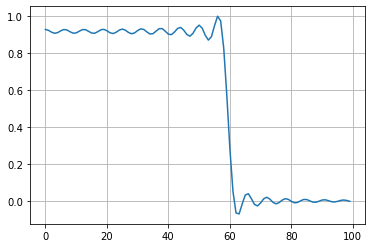

In [75]:
fil1,w1 = Filter("LPF", 0.6*np.pi, 0.3*np.pi, 'hanning', 100)
plt.grid()
plt.plot(fil1)

In [77]:
y1 = sig.lfilter(fil1,1, y)
ipd.display(ipd.Audio(data=y1, rate=fs))

<ipython-input-55-46798bfe7bf4>:26: ComplexWarning: Casting complex values to real discards the imaginary part
  x[i] = a


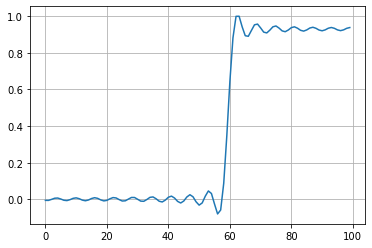

In [76]:
fil2, w = Filter("HPF", 0.6*np.pi, 0.3*np.pi, '', 100)
plt.grid()
plt.plot(fil2)

In [78]:
y2 = sig.lfilter(fil2,1, y)
ipd.display(ipd.Audio(data=y2, rate=fs))